In [2]:
import numpy as np
import matplotlib.pyplot as plt

import lattpy as lp
from lattpy import plotting

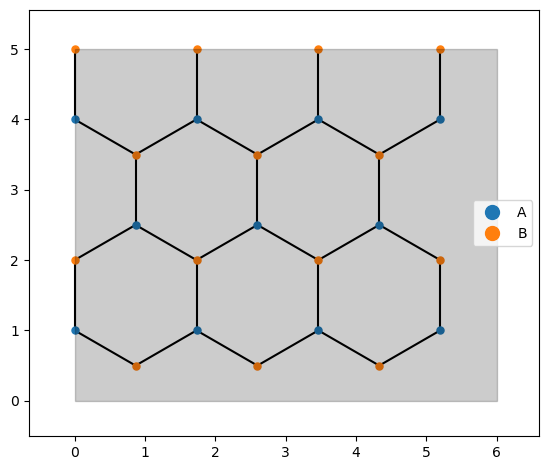

In [3]:
a_0 = 1
a = np.sqrt(3) * a_0

graphene_A = lp.Atom("A", radius=0.05)
graphene_B = lp.Atom("B", radius=0.05)

basis = 0.5 * a * np.array([[1, np.sqrt(3)],
                  [1, -np.sqrt(3)]])

latt = lp.Lattice(basis)


latt.add_atom([0.5 * a, -0.5 * a / np.sqrt(3)], graphene_A)
latt.add_atom([0.5 * a, 0.5 * a / np.sqrt(3)], graphene_B)
latt.add_connection(graphene_A, graphene_B, analyze=True)

#neighbors = latt.get_neighbors([0.5 * a, -0.5 * a / np.sqrt(3)], alpha=0, distidx=0)

#print(latt.get_neighbor_positions([0.5 * a, -0.5 * a / np.sqrt(3)], alpha=0, distidx=1))

structure = latt.build((6, 5))

#latt.set_periodic(0)

ax = latt.plot()

structure.plot(ax)
#lp.plotting.draw_unit_cell(ax, latt.center() + basis)

plt.savefig('graphene lattice.pdf', bbox_inches='tight')

[[ 3.62759873  2.0943951 ]
 [ 3.62759873 -2.0943951 ]]
[1.81379936 1.04719755]
[2.41839915 0.        ]


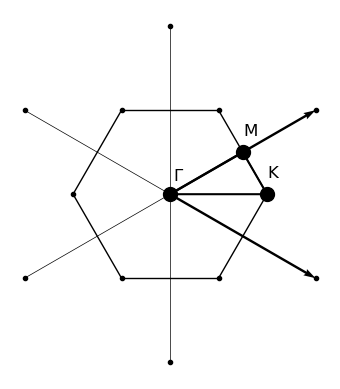

In [5]:

reciprocal_lattice = latt.reciprocal_lattice()

basis = reciprocal_lattice.vectors
print(basis)

bz = reciprocal_lattice.wigner_seitz_cell()

ax = bz.draw(color='black')

lp.plotting.draw_arrows(ax, basis[0])
lp.plotting.draw_arrows(ax, basis[1])
#ax.annotate('$\mathbf{b}_1$', basis[0])

Gamma = bz.symmetry_points()[0]
M = bz.symmetry_points()[2][5]
K = bz.symmetry_points()[1][4]

print(M)
print(K)

lp.plotting.draw_points(ax, Gamma, color='black')
lp.plotting.draw_points(ax, M, color='black')
lp.plotting.draw_points(ax, K, color='black')

lp.plotting.draw_line(ax, np.array([Gamma, M, K, Gamma]), color='black')

ax.annotate('$\Gamma$', (Gamma[0], Gamma[1]), xytext=(2, 10), textcoords='offset points', fontsize='large')
ax.annotate('$\mathrm{M}$', (M[0], M[1]), xytext=(0, 12), textcoords='offset points', fontsize='large')
ax.annotate('$\mathrm{K}$', (K[0], K[1]), xytext=(0, 12), textcoords='offset points', fontsize='large')

lp.plotting.hide_box(ax, axis=True)

plt.savefig('graphene brillouin_zone.pdf', bbox_inches='tight')

In [5]:
path = lp.disptools.DispersionPath(dim=2)

path.add(Gamma, "Gamma")
path.add(M, "M")
path.add(K, "K")
        
path.x(a=a)
path.cycle()

vectors = path.build(n_sect=1000)
print(vectors)

[[0.         0.        ]
 [0.00314474 0.00181561]
 [0.00628947 0.00363123]
 ...
 [0.00628947 0.        ]
 [0.00314474 0.        ]
 [0.         0.        ]]
